# Домашнее задание 4. Функции (HW)

## Задача

Для закрепления пройденного материала предлагаем вам следующее задание: используя библиотеку kaggle-environments, реализующую функционал взаимодействия между виртуальными агентами в рамках нескольких популярных игр, реализовать самостоятельно несколько агентов и сравнить их в игре «камень-ножницы-бумага».

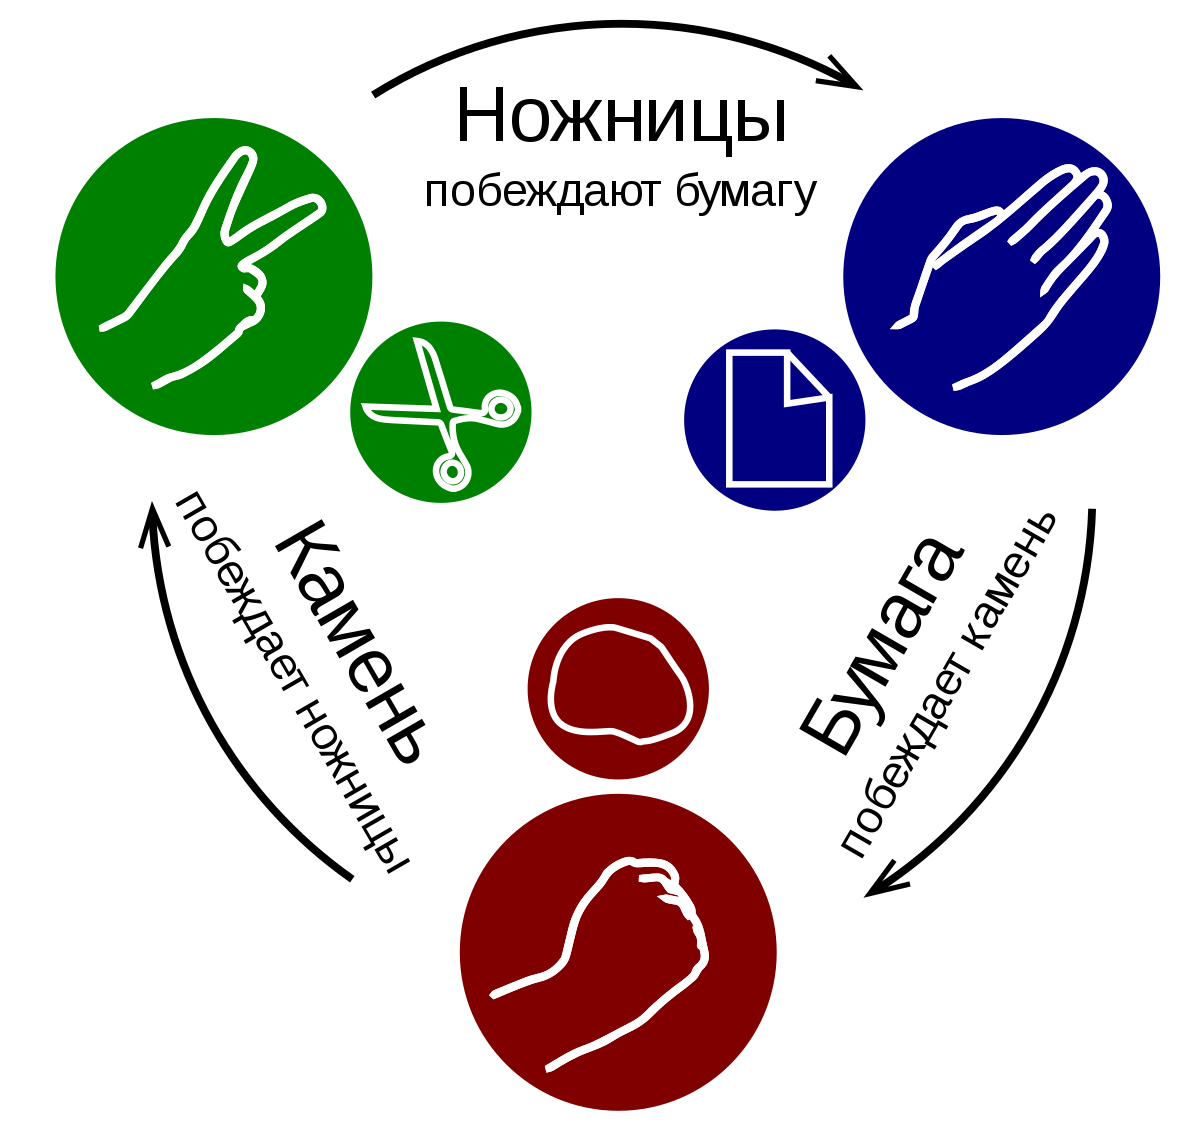

### Вам необходимо:

* Описать поведение бота, который будет играть с такими же ботами в игру «камень-ножницы-бумага». Поведение бота описывается с помощью функции, которая принимает на вход информацию о прошлых играх. (сигнатура функции [приведена в Google Colab](https://colab.research.google.com/drive/1XP0dsb-T3ORPYv4YQFV5j23PknFH06O6?usp=sharing), а детальное описание входящих значений [доступно по ссылке](https://github.com/Kaggle/kaggle-environments/tree/master/kaggle_environments/envs/rps))
* После описания поведения агентов запустить турнир между ними и проверить, какая стратегия показывает себя лучше всех.


Отметим, что вам необязательно использовать «качественные» стратегии — в этом задании основной упор необходимо сделать на разнообразие (т.е. агенты, которые бы играли, придерживаясь стратегии «только камень» или »только ножницы» – это нормально).
 

### Ресурсы:

* [API](https://github.com/Kaggle/kaggle-environments/tree/master/kaggle_environments/envs/rps)
* [Код для запуска тестов и шаблон агента](https://colab.research.google.com/drive/1XP0dsb-T3ORPYv4YQFV5j23PknFH06O6?usp=sharing)

Результат прислать в формате ссылки на Github с ноутбуком

### Критерии оценки результата:

**Критерий 1.** Качество кода

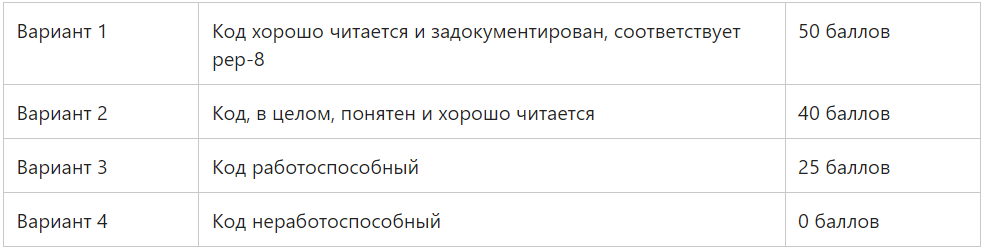

**Критерий 2.** Разнообразность реализованных агентов

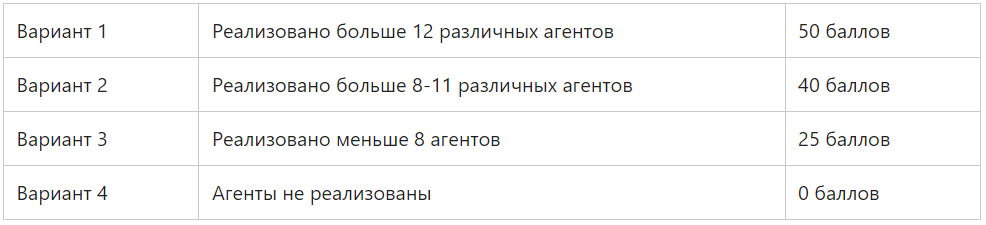

## Решение

Будем учитывать, что:
* 0 - rock
* 1 - paper
* 2 - scissors

### Импортирование бибилиотек

In [19]:
#!pip install -q -U kaggle_environments

In [20]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

No pygame installed, ignoring import


### Описание поведения агентов (ботов)

#### 1. Агент(бот), вегда играющий "камень"

In [23]:
%%writefile rock_agent.py

def rock_agent(observation, configuration):
    return 0

Overwriting rock_agent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [25]:
evaluate(
    "rps", 
    ["rock_agent.py", "statistical"], 
    configuration={"episodeSteps": 100} 
)

[[-98.0, 98.0]]

#### 2. Агент(бот), вегда играющий "бумагу"

In [27]:
%%writefile paper_agent.py

def paper_agent(observation, configuration):
    return 1

Overwriting paper_agent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [29]:
evaluate(
    "rps",
    ["paper_agent.py", "statistical"],
    configuration={"episodeSteps": 100}
)

[[-97.0, 97.0]]

#### 3. Агент(бот), вегда играющий "ножницы"

In [31]:
%%writefile scissors_agent.py

def scissors_agent(observation, configuration):
    return 2

Overwriting scissors_agent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [33]:
evaluate(
    "rps",
    ["scissors_agent.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[-99.0, 99.0]]

#### 4. Агент(бот), вегда играющий рандомно (псевдослучайно)

In [35]:
%%writefile random_agent.py

import random

def random_agent(observation, configuration):
    return random.randrange(0, configuration.signs)

Overwriting random_agent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [37]:
evaluate(
    "rps", 
    ["random_opponent.py", "statistical"], 
    configuration={"episodeSteps": 100}, 
)

[[0, 0]]

#### 5. Агент(бот), вегда играющий, прошлые действия противника

In [39]:
%%writefile copy_opponent.py

import random

def copy_opponent(observation, configuration):
    res = random.randrange(0, configuration.signs)
    if observation.step > 0:
        res = observation.lastOpponentAction
    return res

Overwriting copy_opponent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [41]:
evaluate(
    "rps",
    ["copy_opponent.py", "statistical"],
    configuration = {"episodeSteps": 100},
)

[[-20.0, 20.0]]

#### 6. Агент(бот), вегда учитывающий, прошлые действия противника, но играющий слудующий (+ 1) за прошлым действием ход (исходя из 0 - rock, 1 - paper, 2 - scissors) )

In [43]:
%%writefile copy_opponent_next.py

import random

def copy_opponent_next(observation, configuration):
    res = random.randrange(0, configuration.signs)
    if observation.step > 0:
        res = (observation.lastOpponentAction + 1) % configuration.signs
    return res

Overwriting copy_opponent_next.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [45]:
evaluate(
    "rps",
    ["copy_opponent_next.py", "statistical"],
    configuration = {"episodeSteps": 100},
)

[[57.0, -57.0]]

#### 7. Агент(бот), вегда учитывающий, прошлые действия противника, но играющий предыдущий (- 1) за прошлым действием ход (исходя из 0 - rock, 1 - paper, 2 - scissors)

In [47]:
%%writefile copy_opponent_previous.py

import random

def copy_opponent_previous(observation, configuration):
    res = random.randrange(0, configuration.signs)
    if observation.step > 0:
        res = (observation.lastOpponentAction + 2) % configuration.signs
    return res

Overwriting copy_opponent_previous.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [49]:
evaluate(
    "rps",
    ["copy_opponent_previous.py", "statistical"],
    configuration = {"episodeSteps": 100},
)

[[-96.0, 96.0]]

#### 8. Агент(бот), вегда играющий случайное действие, кроме прошлого действия противника

In [51]:
%%writefile opposite_agent.py

import random

def opposite_agent(observation, configuration):
    res = random.randrange(0, configuration.signs)
    if observation.step > 0:
        temp_lst = [0, 1, 2]
        temp_lst.remove(observation.lastOpponentAction)
        res = random.choice(temp_lst)
    return res

Overwriting opposite_agent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [53]:
evaluate(
    "rps",
    ["opposite_agent.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[0, 0]]

#### 9. Агент(бот), вегда играющий одно и тоже действие 3 раза подряд, после чего меняет на случайное действие

In [55]:
%%writefile random_sub3_agent.py

import random

stable_sign = None

def random_sub3_agent(observation, configuration):
    global stable_sign
    if observation.step % 3 == 0:
        stable_sign = random.randrange(0, configuration.signs)
    return stable_sign

Overwriting random_sub3_agent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [57]:
evaluate(
    "rps",
    ["random_sub3_agent.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[0, 0]]

#### 10. Агент(бот), вегда играющий одно и тоже действие 1-5 раза подряд, после чего меняет на случайное действие

In [59]:
%%writefile random_sub_n_agent.py

import random

stable_sign = None
counter = 0

def random_sub_n_agent(observation, configuration):
    global stable_sign
    global counter 
    if counter == 0:
        counter = random.randint(1, 5)
        stable_sign = random.randrange(0, configuration.signs)
    counter -= 1
    return stable_sign

Overwriting random_sub_n_agent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [61]:
evaluate(
    "rps",
    ["random_sub_n_agent.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[0, 0]]

#### 11. Агент(бот), вегда играющий по очереди камень, бумагу, ножницы

In [63]:
%%writefile seq_agent.py

def seq_agent(observation, configuration):
    return observation.step % 3

Overwriting seq_agent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [65]:
evaluate(
    "rps",
    ["seq_agent.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[0, 0]]

#### 12. Агент(бот), вегда учитывающий результаты прошлой игры, и при выигрыше не меняющий действие, а при проигрыше/ничьей играющий следующий ход (+ 1) за прошлым своим ходом (исходя из 0 - rock, 1 - paper, 2 - scissors)


In [67]:
%%writefile last_game_startegy_1.py
import random
import math

# Функция, определяющая результат прошлого хода (0 - ничья, 1 - победа агента, -1 - поражение агента)
def get_score_last_game(agent_action, opponent_action, signs):
    if agent_action == opponent_action:
        res = 0
    elif ((agent_action + 1) % signs) == opponent_action:
        res = -1
    else:
        res = 1
    return res

action = None

def last_game_startegy_1(observation, configuration):
    global action
    if observation.step == 0:
        action = random.randrange(0, configuration.signs)
    elif get_score_last_game(action, observation.lastOpponentAction, configuration.signs) != 1:
        action = (action + 1) % configuration.signs
    return action

Overwriting last_game_startegy_1.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [69]:
evaluate(
    "rps",
    ["last_game_startegy_1.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[27.0, -27.0]]

#### 13. Агент(бот), вегда учитывающий результаты прошлой игры, и при выигрыше не меняющий действие, а при проигрыше/ничьей играющий следующий ход (- 1) за прошлым своим ходом (исходя из 0 - rock, 1 - paper, 2 - scissors)

In [71]:
%%writefile last_game_startegy_2.py
import random
import math

# Функция, определяющая результат прошлого хода (0 - ничья, 1 - победа агента, -1 - поражение агента)
def get_score_last_game(agent_action, opponent_action, signs):
    if agent_action == opponent_action:
        res = 0
    elif ((agent_action + 1) % signs) == opponent_action:
        res = -1
    else:
        res = 1
    return res

action = None

def last_game_startegy_2(observation, configuration):
    global action
    if observation.step == 0:
        action = random.randrange(0, configuration.signs)
    elif get_score_last_game(action, observation.lastOpponentAction, configuration.signs) != 1:
        action = (action + 2) % configuration.signs
    return action

Overwriting last_game_startegy_2.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [73]:
evaluate(
    "rps",
    ["last_game_startegy_2.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[57.0, -57.0]]

#### 14. Агент(бот), вегда учитывающий результаты прошлой игры, и при выигрыше не меняющий действие, а при проигрыше/ничьей играющий предыдущий ход опонента.

In [75]:
%%writefile last_game_startegy_3.py
import random
import math

# Функция, определяющая результат прошлого хода (0 - ничья, 1 - победа агента, -1 - поражение агента)
def get_score_last_game(agent_action, opponent_action, signs):
    if agent_action == opponent_action:
        res = 0
    elif ((agent_action + 1) % signs) == opponent_action:
        res = -1
    else:
        res = 1
    return res

action = None

def last_game_startegy_3(observation, configuration):
    global action
    if observation.step == 0:
        action = random.randrange(0, configuration.signs)
    elif get_score_last_game(action, observation.lastOpponentAction, configuration.signs) != 1:
        action = observation.lastOpponentAction
    return action

Overwriting last_game_startegy_3.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [77]:
evaluate(
    "rps",
    ["last_game_startegy_3.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[0, 0]]

#### 15. Агент(бот), вегда учитывающий результаты прошлой игры, и при выигрыше не меняющий действие, а при проигрыше/ничьей играющий следующий ход (+ 1) за прошлым своим ходом опонента (исходя из 0 - rock, 1 - paper, 2 - scissors).

In [79]:
%%writefile last_game_startegy_opponent_next_1.py
import random
import math

# Функция, определяющая результат прошлого хода (0 - ничья, 1 - победа агента, -1 - поражение агента)
def get_score_last_game(agent_action, opponent_action, signs):
    if agent_action == opponent_action:
        res = 0
    elif ((agent_action + 1) % signs) == opponent_action:
        res = -1
    else:
        res = 1
    return res

action = None

def last_game_startegy_opponent_next_1(observation, configuration):
    global action
    if observation.step == 0:
        action = random.randrange(0, configuration.signs)
    elif get_score_last_game(action, observation.lastOpponentAction, configuration.signs) != 1:
        action = (observation.lastOpponentAction + 1) % configuration.signs
    return action

Overwriting last_game_startegy_opponent_next_1.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [81]:
evaluate(
    "rps",
    ["last_game_startegy_opponent_next_1.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[57.0, -57.0]]

#### 16. Агент(бот), вегда учитывающий результаты прошлой игры, и при проигрыше/ничьей не меняющий действие, а при выигрыше играющий следующий ход (+ 1) за прошлым своим ходом опонента (исходя из 0 - rock, 1 - paper, 2 - scissors).

In [83]:
%%writefile last_game_startegy_opponent_next_2.py
import random
import math

# Функция, определяющая результат прошлого хода (0 - ничья, 1 - победа агента, -1 - поражение агента)
def get_score_last_game(agent_action, opponent_action, signs):
    if agent_action == opponent_action:
        res = 0
    elif ((agent_action + 1) % signs) == opponent_action:
        res = -1
    else:
        res = 1
    return res

action = None

def last_game_startegy_opponent_next_2(observation, configuration):
    global action
    if observation.step == 0:
        action = random.randrange(0, configuration.signs)
    elif get_score_last_game(action, observation.lastOpponentAction, configuration.signs) == 1:
        action = (observation.lastOpponentAction + 1) % configuration.signs
    return action

Overwriting last_game_startegy_opponent_next_2.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [85]:
evaluate(
    "rps",
    ["last_game_startegy_opponent_next_2.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[-99.0, 99.0]]

#### 17. Агент(бот), вегда учитывающий результаты прошлой игры, и при выигрыше не меняющий действие, а при проигрыше/ничьей играющий предыдущий ход (- 1) за прошлым своим ходом опонента (исходя из 0 - rock, 1 - paper, 2 - scissors).

In [87]:
%%writefile last_game_startegy_opponent_prev_1.py
import random
import math

# Функция, определяющая результат прошлого хода (0 - ничья, 1 - победа агента, -1 - поражение агента)
def get_score_last_game(agent_action, opponent_action, signs):
    if agent_action == opponent_action:
        res = 0
    elif ((agent_action + 1) % signs) == opponent_action:
        res = -1
    else:
        res = 1
    return res

action = None

def last_game_startegy_opponent_prev_1(observation, configuration):
    global action
    if observation.step == 0:
        action = random.randrange(0, configuration.signs)
    elif get_score_last_game(action, observation.lastOpponentAction, configuration.signs) != 1:
        action = (observation.lastOpponentAction + 2) % configuration.signs
    return action

Overwriting last_game_startegy_opponent_prev_1.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [89]:
evaluate(
    "rps",
    ["last_game_startegy_opponent_prev_1.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[-97.0, 97.0]]

#### 18. Агент(бот), вегда учитывающий результаты прошлой игры, и при проигрыше/ничьей не меняющий действие, а при выигрыше играющий предыдущий ход (- 1) за прошлым своим ходом опонента (исходя из 0 - rock, 1 - paper, 2 - scissors).

In [91]:
%%writefile last_game_startegy_opponent_prev_2.py
import random
import math

# Функция, определяющая результат прошлого хода (0 - ничья, 1 - победа агента, -1 - поражение агента)
def get_score_last_game(agent_action, opponent_action, signs):
    if agent_action == opponent_action:
        res = 0
    elif ((agent_action + 1) % signs) == opponent_action:
        res = -1
    else:
        res = 1
    return res

action = None

def last_game_startegy_opponent_prev_2(observation, configuration):
    global action
    if observation.step == 0:
        action = random.randrange(0, configuration.signs)
    elif get_score_last_game(action, observation.lastOpponentAction, configuration.signs) == 1:
        action = (observation.lastOpponentAction + 2) % configuration.signs
    return action

Overwriting last_game_startegy_opponent_prev_2.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [93]:
evaluate(
    "rps",
    ["last_game_startegy_opponent_prev_2.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[-98.0, 98.0]]

#### 19. Агент(бот), вегда учитывающий результаты прошлой игры, и при выигрыше не меняющий действие, а при проигрыше/ничьей меняет на случайное.

In [95]:
%%writefile last_game_startegy_rand_1.py
import random
import math

# Функция, определяющая результат прошлого хода (0 - ничья, 1 - победа агента, -1 - поражение агента)
def get_score_last_game(agent_action, opponent_action, signs):
    if agent_action == opponent_action:
        res = 0
    elif ((agent_action + 1) % signs) == opponent_action:
        res = -1
    else:
        res = 1
    return res

action = None

def last_game_startegy_rand_1(observation, configuration):
    global action
    if observation.step == 0:
        action = random.randrange(0, configuration.signs)
    elif get_score_last_game(action, observation.lastOpponentAction, configuration.signs) != 1:
        action = random.randrange(0, configuration.signs)
    return action

Overwriting last_game_startegy_rand_1.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [97]:
evaluate(
    "rps",
    ["last_game_startegy_rand_1.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[31.0, -31.0]]

#### 20. Агент(бот), вегда учитывающий результаты прошлой игры, и при выигрыше меняющий действие на случайное, а при проигрыше/ничьей не меняющий действие.

In [99]:
%%writefile last_game_startegy_rand_2.py
import random
import math

# Функция, определяющая результат прошлого хода (0 - ничья, 1 - победа агента, -1 - поражение агента)
def get_score_last_game(agent_action, opponent_action, signs):
    if agent_action == opponent_action:
        res = 0
    elif ((agent_action + 1) % signs) == opponent_action:
        res = -1
    else:
        res = 1
    return res

action = None

def last_game_startegy_rand_2(observation, configuration):
    global action
    if observation.step == 0:
        action = random.randrange(0, configuration.signs)
    elif get_score_last_game(action, observation.lastOpponentAction, configuration.signs) == 1:
        action = random.randrange(0, configuration.signs)
    return action

Overwriting last_game_startegy_rand_2.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим нашего агента, для проведения эксперимента на заданном количестве игр

In [101]:
evaluate(
    "rps",
    ["last_game_startegy_rand_2.py", "statistical"],
    configuration = {"episodeSteps": 100}
)

[[-99.0, 99.0]]

### Проведение туринра среди агентов(ботов)

Теперь проведём турнир среди агентов(ботов) для выявления наилучшей статегии среди всех

In [104]:
# Соберём список всех агентов
agents = ["rock_agent.py",
          "paper_agent.py",
          "scissors_agent.py",
          "random_agent.py",
          "copy_opponent.py",
          "copy_opponent_next.py",
          "copy_opponent_previous.py",
          "opposite_agent.py",
          "random_sub3_agent.py",
          "random_sub_n_agent.py",
          "seq_agent.py",
          "last_game_startegy_1.py",
          "last_game_startegy_2.py",
          "last_game_startegy_3.py",
          "last_game_startegy_opponent_next_1.py",
          "last_game_startegy_opponent_next_2.py",
          "last_game_startegy_opponent_prev_1.py",
          "last_game_startegy_opponent_prev_2.py",
          "last_game_startegy_rand_1.py",
          "last_game_startegy_rand_2.py",
         ]
num_agents = len(agents)
print(f"Общее число агентов составило: {num_agents}")

Общее число агентов составило: 20


In [105]:
# Создадим словарь с результатами побед для каждого агента по матчам
rank_agent_matches = {agent: 0 for agent in agents}
display(rank_agent_matches)

{'rock_agent.py': 0,
 'paper_agent.py': 0,
 'scissors_agent.py': 0,
 'random_agent.py': 0,
 'copy_opponent.py': 0,
 'copy_opponent_next.py': 0,
 'copy_opponent_previous.py': 0,
 'opposite_agent.py': 0,
 'random_sub3_agent.py': 0,
 'random_sub_n_agent.py': 0,
 'seq_agent.py': 0,
 'last_game_startegy_1.py': 0,
 'last_game_startegy_2.py': 0,
 'last_game_startegy_3.py': 0,
 'last_game_startegy_opponent_next_1.py': 0,
 'last_game_startegy_opponent_next_2.py': 0,
 'last_game_startegy_opponent_prev_1.py': 0,
 'last_game_startegy_opponent_prev_2.py': 0,
 'last_game_startegy_rand_1.py': 0,
 'last_game_startegy_rand_2.py': 0}

In [106]:
# Создадим словарь с результатами побед для каждого агента по раундам
rank_agent_rounds = {agent: 0 for agent in agents}
display(rank_agent_rounds)

{'rock_agent.py': 0,
 'paper_agent.py': 0,
 'scissors_agent.py': 0,
 'random_agent.py': 0,
 'copy_opponent.py': 0,
 'copy_opponent_next.py': 0,
 'copy_opponent_previous.py': 0,
 'opposite_agent.py': 0,
 'random_sub3_agent.py': 0,
 'random_sub_n_agent.py': 0,
 'seq_agent.py': 0,
 'last_game_startegy_1.py': 0,
 'last_game_startegy_2.py': 0,
 'last_game_startegy_3.py': 0,
 'last_game_startegy_opponent_next_1.py': 0,
 'last_game_startegy_opponent_next_2.py': 0,
 'last_game_startegy_opponent_prev_1.py': 0,
 'last_game_startegy_opponent_prev_2.py': 0,
 'last_game_startegy_rand_1.py': 0,
 'last_game_startegy_rand_2.py': 0}

In [107]:
# Кол-во матчей между каждой парой
n_matches = 3

In [108]:
# Проведение турнира
for math in range(n_matches):
    for i in range(num_agents):
        for j in range(i + 1, num_agents):
            eval = evaluate(
                "rps",
                [agents[1], agents[j]],
                configuration = {"episodeSteps": 100}
            )
            if eval[0][0] > eval[0][1]:
                rank_agent_matches[agents[i]] += 1
            elif eval[0][0] < eval[0][1]:
                rank_agent_matches[agents[j]] += 1
            rank_agent_rounds[agents[i]] += eval[0][0]
            rank_agent_rounds[agents[j]] += eval[0][1]

### Результаты турнира

In [110]:
#Результаты по матчам
rank_matches = pd.Series(rank_agent_matches, name = "Кол-во побед в матчах турнира").sort_values(ascending = False).to_frame()
display(rank_matches)

,Кол-во побед в матчах турнира
last_game_startegy_rand_1.py,56
last_game_startegy_opponent_next_1.py,50
last_game_startegy_2.py,42
last_game_startegy_1.py,40
copy_opponent_next.py,25
last_game_startegy_opponent_prev_1.py,24
last_game_startegy_opponent_next_2.py,20
scissors_agent.py,16
last_game_startegy_3.py,16
rock_agent.py,14


In [111]:
#Результаты по раундам
rank_rounds = pd.Series(rank_agent_rounds, name = "Кол-во побед в раундах турнира").sort_values(ascending = False).to_frame()
display(rank_rounds)

,Кол-во побед в раундах турнира
last_game_startegy_rand_1.py,5335.0
last_game_startegy_opponent_next_1.py,4408.0
last_game_startegy_2.py,3308.0
last_game_startegy_1.py,2649.0
last_game_startegy_3.py,896.0
copy_opponent_next.py,807.0
last_game_startegy_opponent_next_2.py,8.0
scissors_agent.py,-395.0
random_agent.py,-462.0
last_game_startegy_opponent_prev_1.py,-583.0


In [112]:
rank = rank_matches.join(rank_rounds, how = 'inner')
display(rank)

,Кол-во побед в матчах турнира,Кол-во побед в раундах турнира
last_game_startegy_rand_1.py,56,5335.0
last_game_startegy_opponent_next_1.py,50,4408.0
last_game_startegy_2.py,42,3308.0
last_game_startegy_1.py,40,2649.0
copy_opponent_next.py,25,807.0
last_game_startegy_opponent_prev_1.py,24,-583.0
last_game_startegy_opponent_next_2.py,20,8.0
scissors_agent.py,16,-395.0
last_game_startegy_3.py,16,896.0
rock_agent.py,14,-629.0


#### Вывод по агентам:

По итогам проведения турнира среди всех агентов наилучший результат показал агент - "last_game_startegy_rand_1.py", суть которого заключается в учитывании результата прошлой игры, при выигрыше не меняющий действие, а при проигрыше/ничьей меняет на случайное действие, он также показал самый лучший результат по кол-ву выигранных раунов в турнире. <br>
2-ое место занял агент - "last_game_startegy_opponent_next_1.py" - учитывающий результаты прошлой игры, и при выигрыше не меняющий действие, а при проигрыше/ничьей играющий следующий ход (+ 1) за прошлым своим ходом опонента (исходя из 0 - rock, 1 - paper, 2 - scissors). <br>
3-е  место занял агент - "last_game_startegy_2.py" - учитывающий результаты прошлой игры, и при выигрыше не меняющий действие, а при проигрыше/ничьей играющий следующий ход (- 1) за прошлым своим ходом (исходя из 0 - rock, 1 - paper, 2 - scissors)